In [3]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Survival_Analysis_in_Python/datasets/'
import pandas as pd
import numpy as np

In [2]:
# exercise 01

"""
Choose the right data for survival analysis

Let's say you're working on estimating the rate at which a new strain of virus spreads in a population. It's always good practice to explore the data you have available before deciding whether to use a statistical model. Look out for any model assumptions and requirements for the data.

Three datasets have been loaded for you, called

    virus_record_a
    virus_record_b
    virus_record_c

Inspect each DataFrame in the console. Which of the DataFrames would be suitable for survival analysis?

pandas and numpy are loaded as pd and np, respectively.
"""

# Instructions

"""
Virus record C and A
"""

# solution

"""
virus_record_a:

    name age exposed_date diagnosed_date virus_positive
    Sam  35   2003-06-12     2003-06-22              1
  Holly  60   2003-02-26     2003-03-01              1
   Yana  26   2003-04-02     2003-04-12              1
    Ben  43   2003-06-01     2003-06-05              0
  Freda  51   2003-04-18     2003-04-29              0

virus_record_b:


  city virus_positive_count population_count
    A                 3422           171100
    B                  490            24500
    C                 3842           128000
    D                  987            96500
    E                 7833           156660

virus_record_c:

    name age days_since_expose virus_positive
    Sam  35                11              1
  Holly  60                 4              1
   Yana  26                11              1
    Ben  43                 5              0
  Freda  51                12              0
"""

#----------------------------------#

# Conclusion

"""
That's right! Both DataFrames can be used for survival analysis because they contain information about survival duration and survival outcome.
"""

"\nThat's right! Both DataFrames can be used for survival analysis because they contain information about survival duration and survival outcome.\n"

In [1]:
# exercise 02

"""
Identify the censorship type

You are a teacher who's interested in measuring how long it takes for students to completely finish an exam. Unfortunately, a student cheated and started early. You don't know how much earlier he started, but you observed that he finished the exam before class ended.

The scenario is captured in this diagram:

censorship type diagram for exercise

What type of censorship is this?
"""

# Instructions

"""
Possible Answers

    There is no censorship issue. You observed that the student finished the exam.
    
    
    (This is right-censored. The actual duration is longer than what you observed.)(Answer)
    
    
    This is left-censored. The start time of the exam is unknown.
    
    
    This is interval-censored. Only an interval of the event was observed.
"""

# solution



#----------------------------------#

# Conclusion

"""
This is correct! A common misconception about censorship is that if the left-side of the duration is unknown, the data is left-censored. This is not always true.
"""

'\n\n'

In [8]:
dolphin_df = pd.read_csv(path_data+'dolphin_df.csv')
dolphin_df.head()


,birth_date,death_date
0,1977-12-26,1991-04-25
1,1976-03-05,1989-12-19
2,1981-03-04,2003-10-03
3,1997-02-26,2019-06-30
4,1978-05-06,1992-02-06


In [9]:
# exercise 03

"""
Preprocess censored data

You are a marine-biologist studying the lifespan of spinner dolphins. You have access to historical data detailing their birth and death dates. Some tagged dolphins migrated to a different part of the water and the lab lost track of them. Some dolphins are migrants from a different pod, and their exact birth dates are unknown. Some dolphins are still alive!

    If the birth date is NaN, the dolphin is a migrant.
    If the death date is NaN, the dolphin either ran away or is alive.

The DataFrame is called dolphin_df. To create a new column called observed to flag if a dolphin's lifetime is censored, fill out the function check_observed with appropriate values and use .apply() to apply the function to dolphin_df.

pandas and numpy are loaded as pd and np, respectively.
"""

# Instructions

"""

    Create a function check_observed to return 0 if the data point is censored, and 1 otherwise.
    Create a censorship flag column called observed using the function check_observed.
    Print the average value of the observed column in the console.

"""

# solution

# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['birth_date']):
        flag = 0
    elif pd.isna(row['death_date']):
        flag = 0
    else:
        flag = 1
    return flag
  
# Create a censorship flag column
dolphin_df['observed'] = dolphin_df.apply(check_observed, axis=1)

# Print average of observed
print(np.average(dolphin_df['observed']))

#----------------------------------#

# Conclusion

"""
Great job! You often have to preprocess time-to-event data to create the censorship column based on context. The average you just printed is the proportion of censored data in the DataFrame.
"""

0.8566666666666667


'\nGreat job! You often have to preprocess time-to-event data to create the censorship column based on context. The average you just printed is the proportion of censored data in the DataFrame.\n'

In [10]:
regime_durations = pd.read_csv(path_data+'dd.csv')
regime_durations.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [11]:
# exercise 04

"""
First look at censored data

You are the lead data scientist at the national government of a small country named Data Land. You are helping write the law on how long presidencies should last. Because your country relies on data for every decision, you seek wisdom from a DataFrame of 1808 regimes across 202 countries, called regime_durations. How long do regimes tend to last? The fate of your country lies between the rows and in your hands…

Your goal is to calculate the average duration. Because you are using a time-to-event dataset, you will need to inspect the data to check for censorship.

The pandas package is loaded as pd. The durations DataFrame is loaded and stored as regime_durations. You can use the console to view the DataFrame's column names.
"""

# Instructions

"""

    Print the first row of the DataFrame to identify the correct column that indicates censorship.
    Count the number of censored data points in regime_durations and store the result as count.
    Print count in the console.
---
Question

Considering the number of rows with censored data, can you use survival analysis for regime_durations?
(Yes)
"""

# solution

# Print first row
print(regime_durations.head(1))

# Count censored data
count = len(regime_durations[regime_durations['observed'] == 0])

# Print the count to console
print(count)

#----------------------------------#

# Conclusion

"""
Correct! Given 340 regime durations (about 18% of your data) are censored, you may use survival analysis to handle the data.
"""

      ctryname  cowcode2  politycode un_region_name un_continent_name  \
0  Afghanistan       700       700.0  Southern Asia              Asia   

                 ehead                                     leaderspellreg  \
0  Mohammad Zahir Shah  Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...   

       democracy    regime  start_year  duration  observed  
0  Non-democracy  Monarchy        1946         7         1  
340


'\nCorrect! Given 340 regime durations (about 18% of your data) are censored, you may use survival analysis to handle the data.\n'

In [12]:
import matplotlib.pyplot as plt
import lifelines

In [13]:
prison = pd.read_csv(path_data+'rossi.csv')

prison_kmf = lifelines.KaplanMeierFitter()

prison_kmf.fit(prison['week'], prison['arrest'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 432 total observations, 318 right-censored observations>

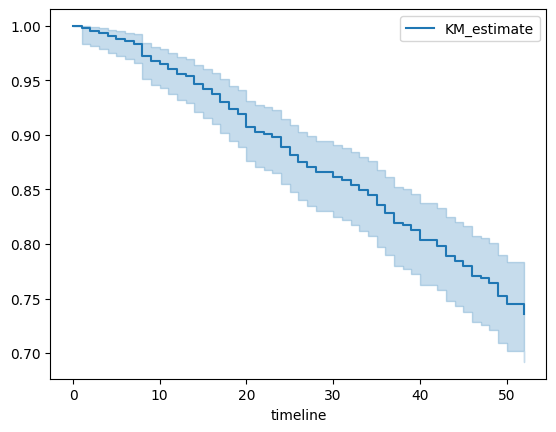

'\nGreat job! Libraries like lifelines make it easy to plot survival curves for quick inference. In future chapters, you will learn different types of survival functions and different ways to visualize them!\n'

In [14]:
# exercise 05

"""
Draw a survival curve

You are a sociologist studying how convicts behave after their release. The DataFrame prison contains the information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release. There are two main columns of interest:

    week: the number of weeks elapsed since release
    arrest: whether the convict has been re-arrested within one year after release

A Kaplan Meier survival function has been fitted for you and the model object is called prison_kmf. Can you visualize the survival curve of prison_kmf?

The matplotlib.pyplot library is imported as plt and the lifelines module has also been imported for you.
"""

# Instructions

"""

    Plot the survival curve of prison_kmf.
    Display the survival curve plot.
---
Question

Use the survival curve you plotted to infer the probability that an ex-convict is re-arrested within 30 weeks.
(14%) == 1 - porb_of_not_being_arrested where porb_of_not_being_arrested = 86%  
"""

# solution

# Plot the survival function
prison_kmf.plot_survival_function()

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Libraries like lifelines make it easy to plot survival curves for quick inference. In future chapters, you will learn different types of survival functions and different ways to visualize them!
"""

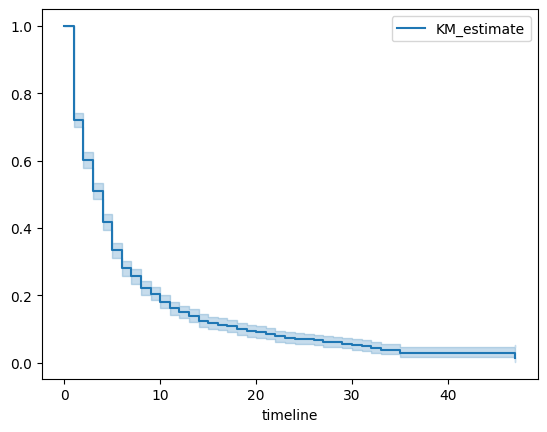

'\nApproximately 50% of regimes last shorter than 4 years, and the other regimes last 4 years or longer.\n'

In [15]:
# exercise 06

"""
Long live democracy!

Earlier in the chapter, we explored and confirmed the data censorship issue for the regime durations dataset. Now, it is time to build your first survival curve for estimating average duration.

Your job is to estimate a survival function and plot a survival curve to show the survival probabilities. To estimate the survival function, you will create an instance of the KaplanMeierFitter object and fit it to the appropriate data columns. The parameter names have been provided for you as you will learn more about fitting survival functions in later chapters.

The pandas package is loaded as pd, the matplotlib.pyplot module is loaded as plt, and the KaplanMeierFitter class is imported from lifelines. The durations DataFrame is loaded and stored as regime_durations.
"""

# Instructions

"""

    Instantiate a KaplanMeierFitter object called kmf.
---

    Fill in appropriate column names to fit the Kaplan Meier model kmf to the data.
---

    Plot the results of your Kaplan Meier model using `.plotsurvivalfunction()``.
---
Question

What is the approximate median duration from all the regimes based on the survival curve?
(4)
"""

# solution

# Instantiate a KaplanMeierFitter object kmf
kmf = lifelines.KaplanMeierFitter()

# Fit the KaplanMeierFitter object to the data
kmf.fit(durations=regime_durations['duration'], 
        event_observed=regime_durations['observed'])

# Visualize and show the survival curve
kmf.plot_survival_function()
plt.show()

#----------------------------------#

# Conclusion

"""
Approximately 50% of regimes last shorter than 4 years, and the other regimes last 4 years or longer.
"""